<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/tarea%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ====================================
# Ejercicio 1
# ====================================
import csv, math
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo CSV directamente
labels = []
dataset = []

with open('mnist_version_corta.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) == 785:
            labels.append(int(row[0]))
            dataset.append(list(map(int, row[1:])))

print(f'Registros: {len(dataset)} — Longitud de vector: {len(dataset[0])} (esperado: 784)')


Registros: 10000 — Longitud de vector: 784 (esperado: 784)


In [2]:
# ====================================
# Ejercicio 2
# ====================================
labels_np = np.array(labels)
data_np = np.array(dataset)
print('Etiquetas en 0..9:', (labels_np.min() >= 0) and (labels_np.max() <= 9))
print('Rango de píxeles 0..255:', (data_np.min() >= 0) and (data_np.max() <= 255))

Etiquetas en 0..9: True
Rango de píxeles 0..255: True


In [3]:
# ====================================
# Ejercicio 3
# ====================================
k = 130
idx = k - 1
print('Etiqueta 130:', labels[idx])
print('Primeros 20 píxeles:', dataset[idx][:20])
print('Total de píxeles:', len(dataset[idx]))


Etiqueta 130: 5
Primeros 20 píxeles: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total de píxeles: 784


In [4]:
# ====================================
# Ejercicio 4
# ====================================
def get_char(pixel: int) -> str:
    if 0 <= pixel < 64:   return " "
    if 64 <= pixel < 128: return "."
    if 128 <= pixel < 192:return "*"
    if 192 <= pixel < 256:return "#"
    return "#"

def render_ascii(vec784: list) -> str:
    return "\n".join(
        ''.join(get_char(vec784[28*i + j]) for j in range(28))
        for i in range(28)
    )

print('Etiqueta:', labels[idx])
print(render_ascii(dataset[idx]))


Etiqueta: 5
                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


In [5]:
# ====================================
# Ejercicio 5
# ====================================
indices = [26, 30, 32, 35]
idx0 = [k-1 for k in indices]
X = np.array([dataset[i] for i in idx0], dtype=float)

# Distancias manuales
D = np.zeros((len(idx0), len(idx0)), dtype=float)
for a in range(len(idx0)):
    for b in range(len(idx0)):
        if a == b:
            D[a,b] = 0.0
        elif a < b:
            diff = X[a] - X[b]
            D[a,b] = D[b,a] = math.sqrt(np.sum(diff*diff))

print("Matriz distancias (manual):")
print(np.round(D, 1))

# Con NumPy
d_26_30 = np.linalg.norm(X[0] - X[1])
print(f"dist(26,30) con np.linalg.norm = {d_26_30:.6f}")

diff = X[:, None, :] - X[None, :, :]
D_np = np.sqrt(np.sum(diff**2, axis=2))
print("Matriz distancias (NumPy):")
print(np.round(D_np, 1))
print("Coinciden manual y NumPy:", np.allclose(D_np, D))


Matriz distancias (manual):
[[   0.  3539.2 3556.4 3223.2]
 [3539.2    0.  1171.8 2531. ]
 [3556.4 1171.8    0.  2515.6]
 [3223.2 2531.  2515.6    0. ]]
dist(26,30) con np.linalg.norm = 3539.223220
Matriz distancias (NumPy):
[[   0.  3539.2 3556.4 3223.2]
 [3539.2    0.  1171.8 2531. ]
 [3556.4 1171.8    0.  2515.6]
 [3223.2 2531.  2515.6    0. ]]
Coinciden manual y NumPy: True


In [6]:
# ====================================
# Ejercicio 6
# ====================================
min_val, min_pair = float('inf'), None
for a in range(D.shape[0]):
    for b in range(a+1, D.shape[1]):
        if D[a,b] < min_val:
            min_val, min_pair = D[a,b], (a,b)

print(f'Par más cercano: {min_pair} — distancia = {min_val:.1f}')
print('Índices 1-indexados:', [26,30,32,35][min_pair[0]], 'y', [26,30,32,35][min_pair[1]])
print('Etiquetas reales:', [labels[i] for i in idx0])


Par más cercano: (1, 2) — distancia = 1171.8
Índices 1-indexados: 30 y 32
Etiquetas reales: [0, 1, 1, 7]


Total ceros: 980 — Total unos: 1135


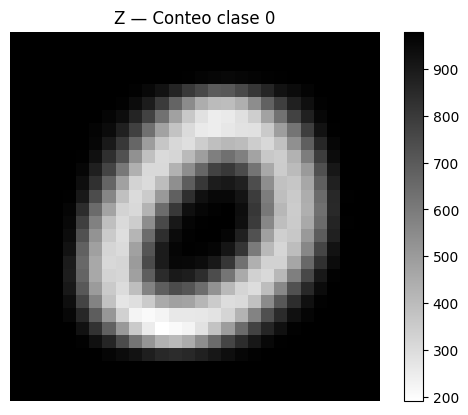

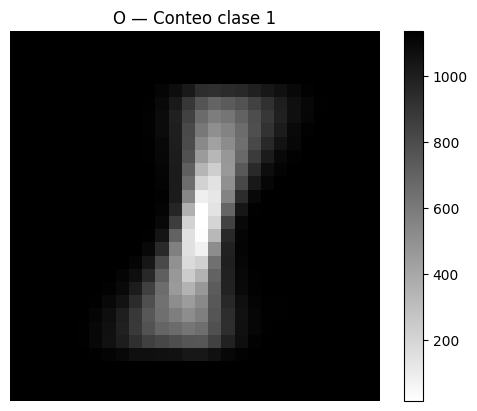

Máximo |Z-O| en i=406 → (fila=14, col=14), valor=958


In [7]:
# ====================================
# Ejercicio 7
# ====================================
X_all = np.array(dataset, dtype=np.uint16)
y_all = np.array(labels, dtype=np.int16)

mask0 = (y_all == 0)
mask1 = (y_all == 1)
X0, X1 = X_all[mask0], X_all[mask1]

thr = 128
Z = (X0 < thr).sum(axis=0)
O = (X1 < thr).sum(axis=0)

print('Total ceros:', int(mask0.sum()), '— Total unos:', int(mask1.sum()))

def show_heatmap(vec784, title):
    img = np.reshape(vec784, (28,28))
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='binary', interpolation='nearest')
    plt.colorbar()
    plt.axis('off')
    plt.show()

show_heatmap(Z, 'Z — Conteo clase 0')
show_heatmap(O, 'O — Conteo clase 1')

diff = np.abs(Z - O)
best_i = int(np.argmax(diff))
r, c = divmod(best_i, 28)
print(f'Máximo |Z-O| en i={best_i} → (fila={r}, col={c}), valor={int(diff[best_i])}')
